In [15]:
import pandas as pd
import xarray as xr
from limix.qc import quantile_gaussianize
import matplotlib.pyplot as plt

In [5]:
# directory containing all input files
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/"

In [6]:
E_file = input_files_dir+"10PCs.csv"
E = pd.read_csv(E_file, index_col = 0)

In [7]:
E.values[:,0]

array([-12.24123085,   4.50912496,  -1.27341425, ..., -18.30062104,
       -13.5641756 , -15.85814765])

In [9]:
E = xr.DataArray(E.values, dims=["cell", "pc"], coords={"cell": E.index.values, "pc": E.columns.values})

In [21]:
E

<xarray.DataArray (cell: 34256, pc: 10)>
array([[-12.24123085, -12.61521861,   0.54720859, ...,  -0.9975142 ,
         -2.13426714,  -4.43458267],
       [  4.50912496, -27.06629325,   7.55644688, ...,   0.82780329,
         -9.56281483,  -1.87179849],
       [ -1.27341425, -23.32348367,  -0.50190342, ...,  -0.64695616,
         -2.17714462,   3.9297493 ],
       ...,
       [-18.30062104,  -8.86433344, -13.15937043, ...,   2.12376903,
         -1.07301402,  -3.17047745],
       [-13.5641756 , -14.99477029,  -3.43784135, ...,  -2.81944577,
         -3.03185678,  -0.44419057],
       [-15.85814765, -17.10920348,  -5.02797608, ...,  -3.71935112,
         -2.63608537,   1.10604378]])
Coordinates:
  * cell     (cell) object '21843_1#10' '21843_1#100' ... '24539_8#98'
  * pc       (pc) object 'PC1' 'PC2' 'PC3' 'PC4' ... 'PC7' 'PC8' 'PC9' 'PC10'

In [11]:
E.cell

<xarray.DataArray 'cell' (cell: 34256)>
array(['21843_1#10', '21843_1#100', '21843_1#101', ..., '24539_8#95',
       '24539_8#97', '24539_8#98'], dtype=object)
Coordinates:
  * cell     (cell) object '21843_1#10' '21843_1#100' ... '24539_8#98'

In [12]:
E_gauss = quantile_gaussianize(E)

In [22]:
E_gauss

<xarray.DataArray (cell: 34256, pc: 10)>
array([[-0.20637171, -0.83511186,  0.20203836, ..., -0.23170471,
        -0.41313084, -0.84856494],
       [ 0.11671654, -2.94120273,  0.87122809, ...,  0.06828524,
        -1.73970821, -0.3633413 ],
       [ 0.05772759, -2.10198286,  0.07554797, ..., -0.17202894,
        -0.42151286,  0.77510877],
       ...,
       [-0.45810767, -0.56833053, -1.44642751, ...,  0.30024558,
        -0.20338278, -0.60676692],
       [-0.25491901, -1.01876078, -0.30545472, ..., -0.51327496,
        -0.60097171, -0.08163998],
       [-0.34464446, -1.20466437, -0.51946185, ..., -0.65543567,
        -0.51895947,  0.22156957]])
Coordinates:
  * cell     (cell) object '21843_1#10' '21843_1#100' ... '24539_8#98'
  * pc       (pc) object 'PC1' 'PC2' 'PC3' 'PC4' ... 'PC7' 'PC8' 'PC9' 'PC10'

In [13]:
E_gauss.cell

<xarray.DataArray 'cell' (cell: 34256)>
array(['21843_1#10', '21843_1#100', '21843_1#101', ..., '24539_8#95',
       '24539_8#97', '24539_8#98'], dtype=object)
Coordinates:
  * cell     (cell) object '21843_1#10' '21843_1#100' ... '24539_8#98'

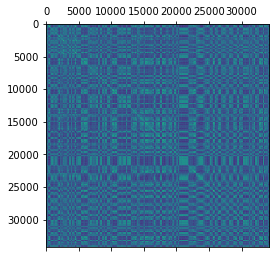

In [19]:
plt.matshow(E.values @ E.values.T)

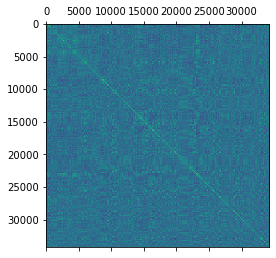

In [20]:
plt.matshow(E_gauss.values @ E_gauss.values.T)